In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
from google.colab import files
uploaded=files.upload()

Saving titanic_train.csv to titanic_train (1).csv


In [50]:
df_train=pd.read_csv('titanic_train.csv')

In [51]:
df=df_train
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


PassengerId:	Passenger Identity

Survived:	Survival (0 = No; 1 = Yes)

Pclass:	Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name:	Name of passenger

Sex:	Sex of passenger

Age:	Age of passenger

SibSp:	Number of sibling and/or spouse travelling with passenger

Parch:	Number of parent and/or children travelling with passenger

Ticket:	Ticket number

Fare:	Price of ticket

Cabin:	Cabin number

Embarkment:	Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [52]:
df.shape

(891, 12)

In [53]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Check Missing Values

In [55]:
miss=df.isnull().sum()
miss1=df.isnull().sum()/len(df)*100
miss_data=pd.concat([miss,miss1],axis=1,keys=['Total','Percentage'])
miss_data

,Total,Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


Cabin have more then 77% data missed so we can delet this column

In [56]:
df.drop('Cabin',axis=1,inplace=True)

Handle Missing Values

In [57]:
df.Age.skew()

0.38910778230082704

it is a skwed data so we will use median for fillna

In [58]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [59]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now Embarked is a Categorical data so we will use mode to fill na

In [60]:
df['Embarked'].fillna(df['Embarked'].mode().iloc[0],inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

PassengerID,Ticket these two variable can not be relate with Survive Rate.

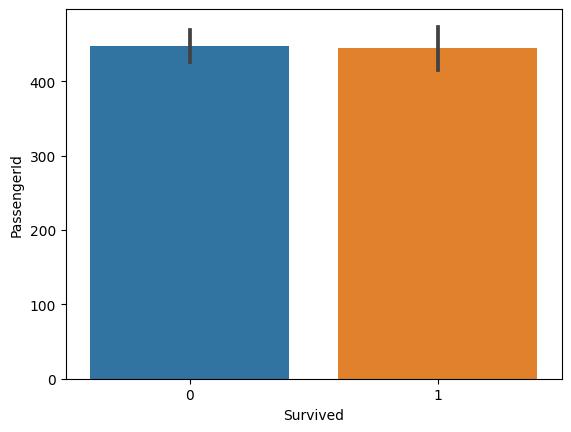

In [61]:
sns.barplot(x='Survived',y='PassengerId',data=df)
plt.show();

PassengerID not able to explaine any variance on Survive rate according to PassengerID, it just devided into both category, according to its passengers count.

In [62]:
df.drop(columns=['PassengerId','Ticket'],inplace=True)

In our data there are most of binary or ordinal data, only two column is numerical Age and Fare

Numeric columns Analysis

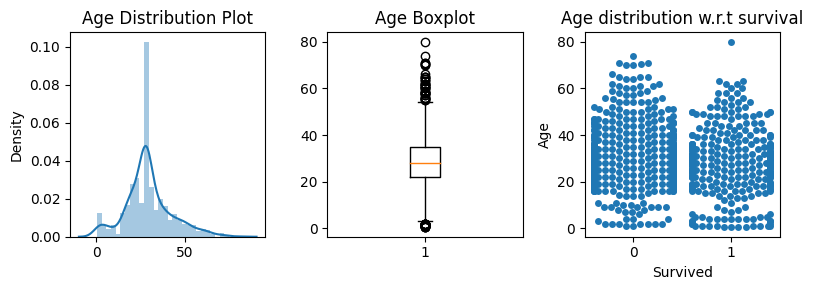

In [63]:
# Age distribution w.r.t passengers count
fig,ax=plt.subplots(1,3,figsize=(8,3))
ax[0].set_title('Age Distribution Plot')
ax[1].set_title('Age Boxplot')
sns.distplot(x=df['Age'],ax=ax[0])
ax[1].boxplot(df['Age'])

# Age distribution w.r.t survival
sns.swarmplot(x='Survived',y='Age',ax=ax[2],data=df)
ax[2].set_title('Age distribution w.r.t survival')
plt.tight_layout()
plt.show()

In [64]:
df.Age.describe(percentiles=[.25,.5,.75,.85,.98])

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
85%       42.000000
98%       62.000000
max       80.000000
Name: Age, dtype: float64

75 % Passengers upto 35 year old, rest of 25 % upto 80 yr, Most of youngest pepoles was travling.

It seems like age is not showing significance w.r.t survival rate but the count of survived passengers is less

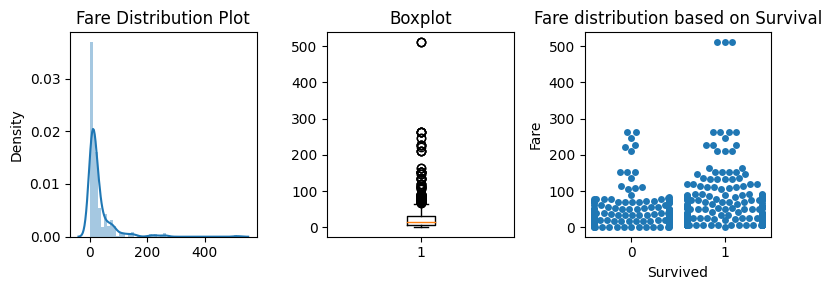

In [65]:
# Fare distribution w.r.t passenger count
fig,ax=plt.subplots(1,3,figsize=(8,3))
ax[0].set_title('Fare Distribution Plot')
ax[1].set_title('Boxplot')
sns.distplot(x=df['Fare'],ax=ax[0])
ax[1].boxplot(df['Fare'])
sns.swarmplot(x='Survived',y='Fare',ax=ax[2],data=df)
ax[2].set_title('Fare distribution based on Survival')
plt.tight_layout()
plt.show();

In [66]:
df['Fare'].describe(percentiles=[.25,.5,.75,.85,.95])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
85%       56.495800
95%      112.079150
max      512.329200
Name: Fare, dtype: float64

Most of passengers spend 0 to 100 dolar (95 % pepole), only 5 % passenger spend more then 100 and few of 500.

Passengers who paid more Fares had more chances of Survival
Fare as high as 514 dollars was purcharsed by very few.(Outlier)

Feature Engineering

In [67]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

There are three column repersent the whole faimily, can be make them one as self+children+perents



In [68]:
df['FaimilySize']=df['SibSp']+df['Parch']+1
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FaimilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2


Now we can remove these Name SibSP and Parch

In [69]:
df.drop(['Name','SibSp','Parch'],axis=1,inplace=True)
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,FaimilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2


In [70]:
df.shape

(891, 7)

In [71]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FaimilySize    0
dtype: int64

Bi-veriate Analysis

In [72]:
#What is Total Count of Survivals and Victims?
Sur=df['Survived'].value_counts()
Sur

0    549
1    342
Name: Survived, dtype: int64

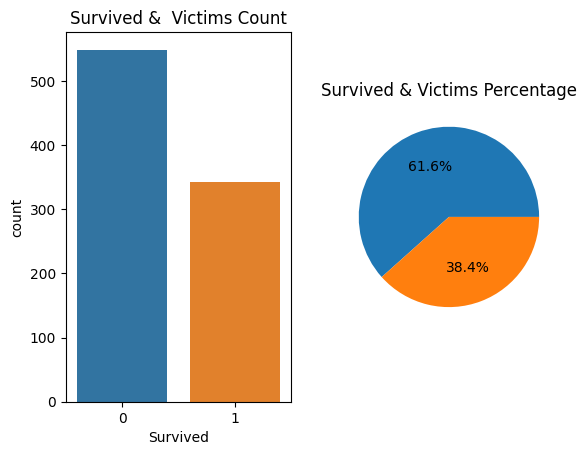

In [73]:
fig,ax=plt.subplots(1,2)
ax[0].set_title('Survived &  Victims Count')
ax[1].set_title('Survived & Victims Percentage')
sns.countplot(x='Survived',ax=ax[0],data=df)
ax[1].pie(df['Survived'].value_counts(),autopct='%1.1f%%')
plt.show()

Count of Survivel is 342 and not survived 549

61.6 % Victims based on present data

In [74]:
#Which Gender has more Survival rate?
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

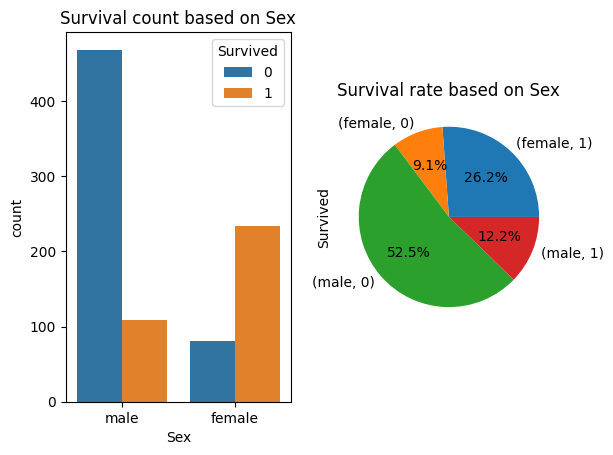

In [75]:
fig,ax=plt.subplots(1,2)
ax[0].set_title('Survival count based on Sex')
ax[1].set_title('Survival rate based on Sex')
df.groupby('Sex')['Survived'].value_counts().plot(kind='pie',ax=ax[1],autopct='%1.1f%%')
sns.countplot(x='Sex',hue='Survived',ax=ax[0],data=df)
plt.show()


Female have more survivel rate its 26.2 %

In [76]:
#What is Survival rate based on Person type(Male,female,Child)
df['Gender']=df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'],axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,FaimilySize,Gender
0,0,3,male,22.0,7.2500,S,2,male
1,1,1,female,38.0,71.2833,C,2,female
2,1,3,female,26.0,7.9250,S,1,female
3,1,1,female,35.0,53.1000,S,2,female
4,0,3,male,35.0,8.0500,S,1,male


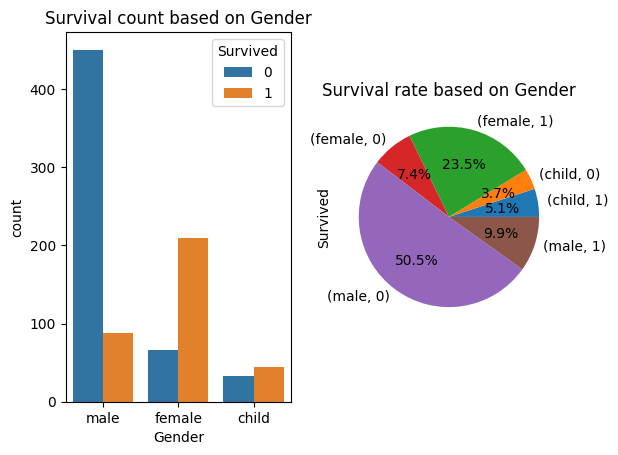

In [77]:
fig,ax=plt.subplots(1,2)
ax[0].set_title('Survival count based on Gender')
ax[1].set_title('Survival rate based on Gender')
df.groupby('Gender')['Survived'].value_counts().plot(kind='pie',ax=ax[1],autopct='%1.1f%%')
sns.countplot(x='Gender',hue='Survived',ax=ax[0],data=df)
plt.show()




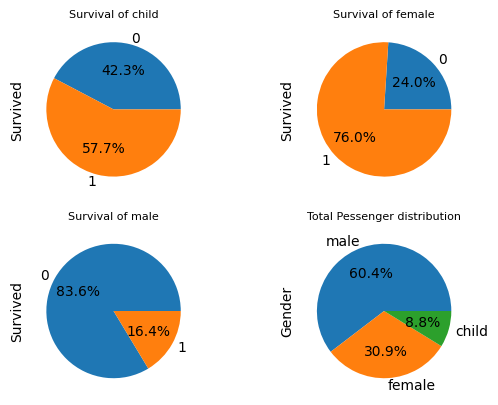

In [78]:
fig,ax=plt.subplots(2,2)
ax[0,0].set_title('Survival of child',size=8)
ax[0,1].set_title('Survival of female',size=8)
ax[1,0].set_title('Survival of male',size=8)
ax[1,1].set_title('Total Pessenger distribution',size=8)
df[df['Gender']=='child'].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[0,0],autopct='%1.1f%%')
df[df['Gender']=='female'].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[0,1],autopct='%1.1f%%')
df[df['Gender']=='male'].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[1,0],autopct='%1.1f%%')
df['Gender'].value_counts().plot(kind='pie',ax=ax[1,1],autopct='%1.1f%%')
plt.show();

In [79]:
#Did Economy Class had an impact on Survival?
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,FaimilySize,Gender
0,0,3,male,22.0,7.2500,S,2,male
1,1,1,female,38.0,71.2833,C,2,female
2,1,3,female,26.0,7.9250,S,1,female
3,1,1,female,35.0,53.1000,S,2,female
4,0,3,male,35.0,8.0500,S,1,male


In [80]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Most of Pepoles travelles in 3rd class

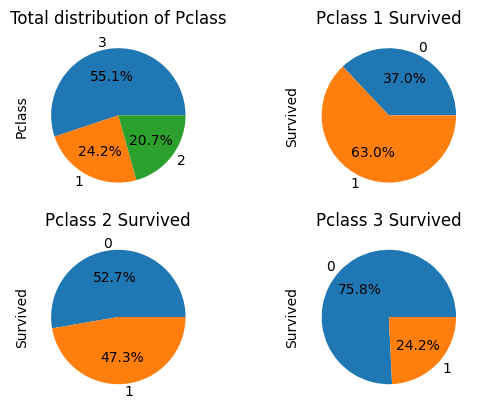

In [81]:
fig,ax=plt.subplots(2,2)
ax[0,0].set_title('Total distribution of Pclass')
ax[0,1].set_title('Pclass 1 Survived')
ax[1,0].set_title('Pclass 2 Survived')
ax[1,1].set_title('Pclass 3 Survived')
df[df['Pclass']==1].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[0,1],autopct='%1.1f%%')
df[df['Pclass']==2].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[1,0],autopct='%1.1f%%')
df[df['Pclass']==3].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[1,1],autopct='%1.1f%%')
df['Pclass'].value_counts().plot(kind='pie',ax=ax[0,0],autopct='%1.1f%%')
plt.show();

We can say Pclass 1 or Economy Class had much chance to survived

Economic Class affected Survival rate and Passengers travelling with First Class had higher ratio of survival about 63% as compared to Class 2 and 3.

What is the Survival probaility based on Embarkment of Passengers?

In [82]:
df.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           219
          C            93
          Q            30
Name: Embarked, dtype: int64

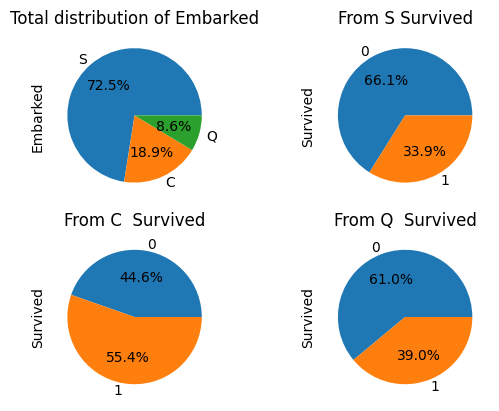

In [83]:
fig,ax=plt.subplots(2,2)
ax[0,0].set_title('Total distribution of Embarked')
ax[0,1].set_title('From S Survived')
ax[1,0].set_title('From C  Survived')
ax[1,1].set_title('From Q  Survived')
df[df['Embarked']=='S'].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[0,1],autopct='%1.1f%%')
df[df['Embarked']=='C'].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[1,0],autopct='%1.1f%%')
df[df['Embarked']=='Q'].Survived.groupby(df.Survived).count().plot(kind='pie',ax=ax[1,1],autopct='%1.1f%%')
df['Embarked'].value_counts().plot(kind='pie',ax=ax[0,0],autopct='%1.1f%%')
plt.show();


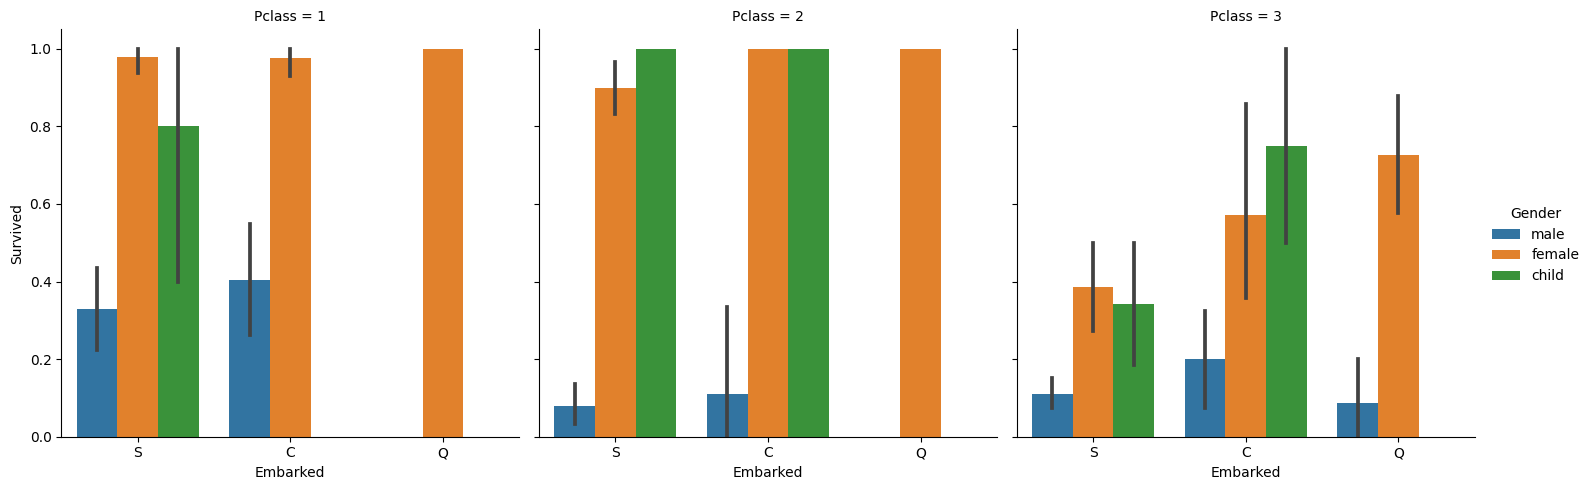

In [84]:
sns.catplot(x="Embarked", y="Survived", hue="Gender",
            col="Pclass", kind='bar',
             data=df);

Most Passengers from port C Survived.

Most Passengers were from Southampton(S).

Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

Males had better survival rate in Port C when compared for S and Q ports.

Females had least Survival rate in Pclass 3

What was Average Fare by Pclass & Embark location?

In [85]:
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [86]:
df.groupby(['Embarked'])['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

Segment Age in bins with size of 20.Also Correlate Age with Survival.

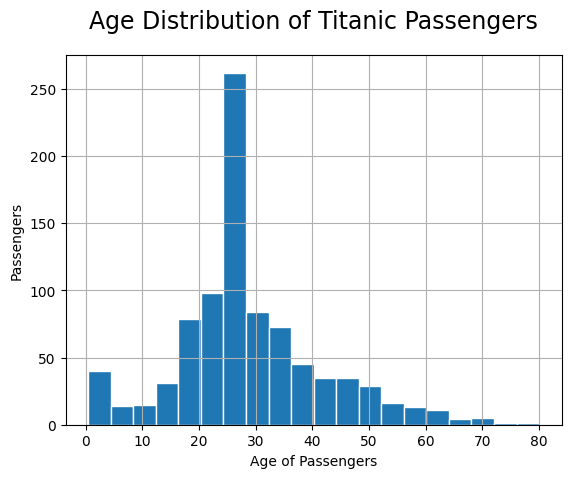

In [87]:
df['Age'].hist(edgecolor='white',bins=20)
plt.ylabel('Passengers')
plt.xlabel('Age of Passengers')
plt.title('Age Distribution of Titanic Passengers',size=17, y=1.05)
plt.show()

In [88]:
df.iloc[:,[0,3]].corr()

,Survived,Age
Survived,1.00000,-0.06491
Age,-0.06491,1.00000


it is inversely prepotional with -.0649 cofficient, if age increases then chance of survive decrease

<Axes: >

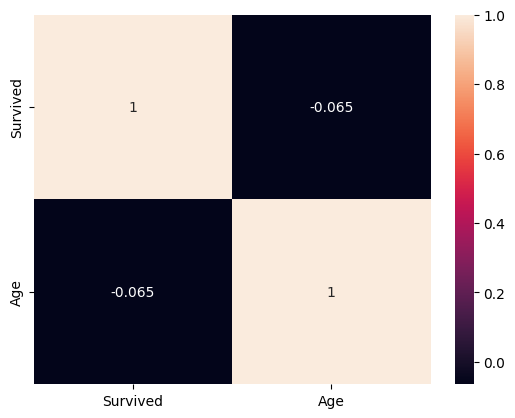

In [89]:
sns.heatmap(df.iloc[:,[0,3]].corr(),annot=True)

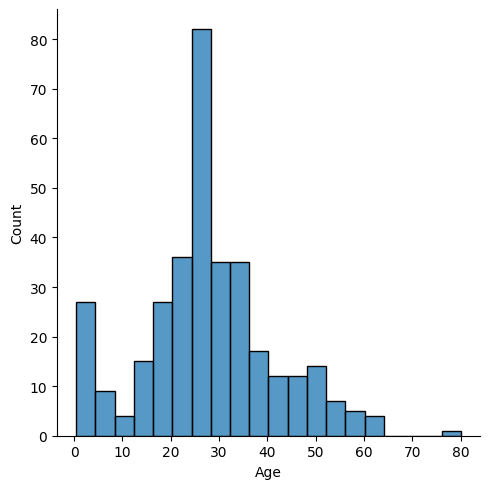

In [90]:
sns.displot(df[df['Survived']==1]['Age'])
plt.show()

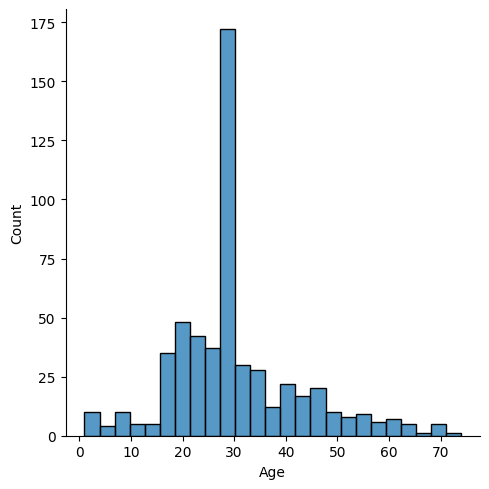

In [91]:
sns.displot(df[df['Survived']==0]['Age']);

In [92]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,FaimilySize,Gender
0,0,3,male,22.0,7.2500,S,2,male
1,1,1,female,38.0,71.2833,C,2,female
2,1,3,female,26.0,7.9250,S,1,female
3,1,1,female,35.0,53.1000,S,2,female
4,0,3,male,35.0,8.0500,S,1,male


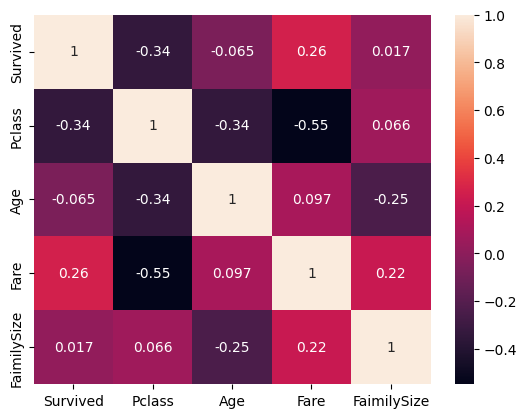

In [93]:
sns.heatmap( df.corr(),annot=True);

How did total family size affected Survival Count?

In [94]:
df[['FaimilySize','Survived']].groupby(['FaimilySize']).mean()*100

,Survived
FaimilySize,
1,30.353818
2,55.279503
3,57.843137
4,72.413793
5,20.000000
6,13.636364
7,33.333333
8,0.000000
11,0.000000


Both men and women had a massive drop of survival with a FamilySize over 4.
The chance to survive as a man increased with FamilySize until a size of 4
Men are not likely to Survive with FamilySize 5 and 6
Big Size Family less likihood of Survival

In [95]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,FaimilySize,Gender
0,0,3,male,22.0,7.2500,S,2,male
1,1,1,female,38.0,71.2833,C,2,female
2,1,3,female,26.0,7.9250,S,1,female
3,1,1,female,35.0,53.1000,S,2,female
4,0,3,male,35.0,8.0500,S,1,male


In [96]:

df.drop('Sex',axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Age,Fare,Embarked,FaimilySize,Gender
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female
3,1,1,35.0,53.1000,S,2,female
4,0,3,35.0,8.0500,S,1,male


Preparing X and Y

In [97]:
X=df.iloc[:,1:]
X.head(5)

,Pclass,Age,Fare,Embarked,FaimilySize,Gender
0,3,22.0,7.2500,S,2,male
1,1,38.0,71.2833,C,2,female
2,3,26.0,7.9250,S,1,female
3,1,35.0,53.1000,S,2,female
4,3,35.0,8.0500,S,1,male


In [98]:
y=df.Survived
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Balance and Imbalance Classifier

In [99]:
#Check Balance or Imbalance data
y.value_counts()/y.count()*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

If data up to in ration 60/40, it is ok but more then it like 65/35 or 70/30 in ratio then it is imbalance data then need treat it.

In [100]:
X.shape

(891, 6)

Spliting X and y into training and test data

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [102]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(596, 6) (295, 6) (596,) (295,)


In [103]:
X_train.head(5)

,Pclass,Age,Fare,Embarked,FaimilySize,Gender
6,1,54.0,51.8625,S,1,male
718,3,28.0,15.5000,Q,1,male
685,2,25.0,41.5792,C,4,male
73,3,26.0,14.4542,C,2,male
882,3,22.0,10.5167,S,1,female


In [104]:
X_test.head(5)

,Pclass,Age,Fare,Embarked,FaimilySize,Gender
709,3,28.0,15.2458,C,3,male
439,2,31.0,10.5000,S,1,male
840,3,20.0,7.9250,S,1,male
720,2,6.0,33.0000,S,2,child
39,3,14.0,11.2417,C,2,child


Numeric column Scaling

In [105]:
Numeric_column=['Age','Fare']

In [106]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
sc=StandardScaler()
X_train[['Age','Fare']]=sc.fit_transform(X_train[Numeric_column])
X_test[['Age','Fare']]=sc.fit_transform(X_test[Numeric_column]);


In [107]:
X_train.head(5)

,Pclass,Age,Fare,Embarked,FaimilySize,Gender
6,1,1.913493,0.387842,S,1,male
718,3,-0.094520,-0.319081,Q,1,male
685,2,-0.326214,0.187924,C,4,male
73,3,-0.248983,-0.339412,C,2,male
882,3,-0.557908,-0.415961,S,1,female


In [108]:
X_test.head(5)

,Pclass,Age,Fare,Embarked,FaimilySize,Gender
709,3,-0.124827,-0.382533,C,3,male
439,2,0.103538,-0.485993,S,1,male
840,3,-0.733800,-0.542129,S,1,male
720,2,-1.799503,0.004513,S,2,child
39,3,-1.190530,-0.469824,C,2,child


In [109]:
X_train=pd.get_dummies(X_train,drop_first=True)

In [110]:
X_test=pd.get_dummies(X_test,drop_first=True)

In [111]:
X_train.shape

(596, 8)

In [112]:
y_train.shape

(596,)

In [113]:
print(X_test.shape,y_test.shape)

(295, 8) (295,)


In [114]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.metrics import cohen_kappa_score
def build_model(X,y,z):
  X=sm.add_constant(X)
  model=sm.Logit(y,X).fit()
  probabilities = model.predict(X)
  y_pred= (probabilities >= z).astype(int)
  conf_matrix = confusion_matrix(y, y_pred)
  classification_rep = classification_report(y,y_pred)
  kappa = cohen_kappa_score(y, y_pred)
  loss = log_loss(y, probabilities)
  print(model.summary())
  print('AIC :',model.aic)
  print('BIC :',model.bic)
  print('kappa :',kappa)
  print('Log_Loss :',loss)
  print('Confusion Matrics :\n',conf_matrix)
  print(classification_rep)


Model 1

In [115]:
build_model(X_train,y_train,.55)

Optimization terminated successfully.
         Current function value: 0.430000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      587
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.3487
Time:                        06:52:24   Log-Likelihood:                -256.28
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 1.102e-54
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2801      0.668      6.410      0.000       2.971       5.589
Pclass           -0.

Senstivity score is low with thresold value .55

Model 2

In [116]:
build_model(X_train,y_train,.6)

Optimization terminated successfully.
         Current function value: 0.430000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      587
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.3487
Time:                        06:52:24   Log-Likelihood:                -256.28
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 1.102e-54
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2801      0.668      6.410      0.000       2.971       5.589
Pclass           -0.

Senstivity score become less when we are increasing thresold value lets check with other value

Model 3

In [117]:
build_model(X_train,y_train,.4)

Optimization terminated successfully.
         Current function value: 0.430000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      587
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.3487
Time:                        06:52:24   Log-Likelihood:                -256.28
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 1.102e-54
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2801      0.668      6.410      0.000       2.971       5.589
Pclass           -0.

Its showing Accuracy 83 % with Kappa score .64 and Log_loss .42

Lets check with deleting insignificant variable by checking P value

In [118]:
X_train_new=X_train.drop(columns=['Gender_female'])
build_model(X_train_new,y_train,.4)

Optimization terminated successfully.
         Current function value: 0.430079
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      588
Method:                           MLE   Df Model:                            7
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.3486
Time:                        06:52:24   Log-Likelihood:                -256.33
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 1.773e-55
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4062      0.531      8.302      0.000       3.366       5.447
Pclass         -0.8317    

By deleting Gender_female there is no effect on model's performance.

In [ ]:
X_train_new=X_train_new.drop(columns=['Embarked_Q'])
build_model(X_train_new,y_train,.4)

Optimization terminated successfully.
         Current function value: 0.431200
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.3469
Time:                        17:00:15   Log-Likelihood:                -257.00
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 4.840e-56
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2867      0.516      8.302      0.000       3.275       5.299
Pclass         -0.8728    

By deleting Embarked Q AIC/BIC decreasing means model complexity decreasing but accuracy also decreasing with kappa score.

In [ ]:
X_train_new=X_train_new.drop(columns=['Embarked_S'])
build_model(X_train_new,y_train,.4)

Optimization terminated successfully.
         Current function value: 0.434360
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.3421
Time:                        16:51:24   Log-Likelihood:                -258.88
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 3.999e-56
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9646      0.482      8.217      0.000       3.019       4.910
Pclass         -0.8543    

By deleting Embarked S, its directly impact on kappa score, ignore to delete this feature

In [ ]:
X_train_new=X_train_new.drop(columns=['FaimilySize'])
build_model(X_train_new,y_train,.4)

Optimization terminated successfully.
         Current function value: 0.458350
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.3058
Time:                        16:51:24   Log-Likelihood:                -273.18
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 6.616e-51
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1878      0.422      7.548      0.000       2.360       4.016
Pclass         -0.9823    

By deleting faimily size its decreasing Accuracy as well kappa score So ignore to delete this feature

In [ ]:
X_train_new=X_train_new.drop(columns=['Age'])
build_model(X_train_new,y_train,.45)

Optimization terminated successfully.
         Current function value: 0.431733
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.3461
Time:                        17:00:22   Log-Likelihood:                -257.31
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 8.504e-57
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2135      0.507      8.308      0.000       3.219       5.207
Pclass         -0.8340    

In [ ]:
build_model(X_train_new,y_train,.4)

Optimization terminated successfully.
         Current function value: 0.431733
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.3461
Time:                        17:09:17   Log-Likelihood:                -257.31
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 8.504e-57
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2135      0.507      8.308      0.000       3.219       5.207
Pclass         -0.8340    

By Compairing Other Model

AIC/BIC decreasing indicates low complexity

Kappa Score increasing Indicates Model reliability increases

Good Accuracy with less number of significant features


Optimization terminated successfully.
         Current function value: 0.431733
         Iterations 6


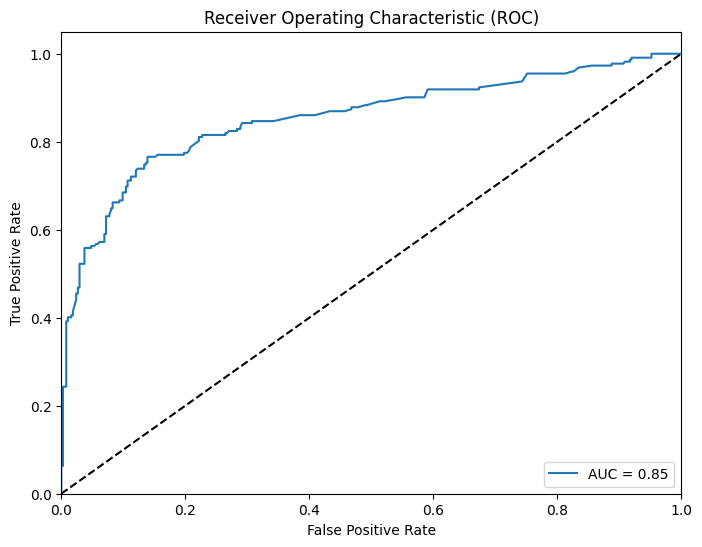

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
X_train_new=sm.add_constant(X_train_new)
model=sm.Logit(y_train,X_train_new).fit()
probabilities = model.predict(X_train_new)
fpr, tpr, thresholds = roc_curve(y_train, probabilities)

# Calculate AUC
auc = roc_auc_score(y_train, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Model Prediction

In [ ]:
X_train_new=X_train_new.drop(columns=['const'],axis=1)


In [ ]:
X_test=X_test[X_train_new.columns]

In [ ]:
print(X_test.shape,y_test.shape)

(295, 5) (295,)


In [ ]:
build_model(X_test,y_test,.4)

Optimization terminated successfully.
         Current function value: 0.398211
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  295
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.4106
Time:                        17:09:32   Log-Likelihood:                -117.47
converged:                       True   LL-Null:                       -199.32
Covariance Type:            nonrobust   LLR p-value:                 1.611e-33
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9571      0.754      6.577      0.000       3.480       6.434
Pclass         -1.1880    

1- Train Accuracy is 83 % and Test accuracy 82 %

2- Kappa Score for train .62 and for test .62, its showing the model reliability
